In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [3]:
data = pd.read_csv('C:/Users/ASUS/Desktop/Project2/store_data.csv')
data

,Sales,Quantity,Discount,Profit,ShippingCost,Region,ShipMode,OrderDate,Market,OrderPriority,Category,SubCategory,Segment
0,13.08,3,0.0,4.56,1.03,North,Standard Class,2014-10-02,LATAM,Medium,Office Supplies,Labels,Consumer
1,252.16,8,0.0,90.72,13.45,South,Standard Class,2012-10-15,LATAM,Medium,Furniture,Furnishings,Consumer
2,193.28,2,0.0,54.08,9.63,South,Standard Class,2012-10-15,LATAM,Medium,Furniture,Bookcases,Consumer
3,35.44,4,0.0,4.96,1.37,South,Standard Class,2012-10-15,LATAM,Medium,Office Supplies,Binders,Consumer
4,71.60,2,0.0,11.44,3.79,South,Standard Class,2012-10-15,LATAM,Medium,Office Supplies,Art,Consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,11.07,1,0.0,3.42,1.98,EMEA,First Class,2012-09-05,EMEA,High,Office Supplies,Binders,Consumer
49666,61.44,2,0.0,18.42,13.02,EMEA,First Class,2012-09-05,EMEA,High,Technology,Accessories,Consumer
49667,80.52,4,0.0,20.88,8.78,EMEA,First Class,2012-09-05,EMEA,High,Office Supplies,Art,Consumer
49668,130.44,4,0.0,33.84,18.97,EMEA,First Class,2012-09-05,EMEA,High,Office Supplies,Paper,Consumer


In [4]:
data['Year'] = pd.to_datetime(data['OrderDate']).dt.year
data = data.drop('OrderDate', axis=1)

In [5]:
df = data.copy()

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49670 entries, 0 to 49669
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          49670 non-null  float64
 1   Quantity       49670 non-null  int64  
 2   Discount       49670 non-null  float64
 3   Profit         49670 non-null  float64
 4   ShippingCost   49670 non-null  float64
 5   Region         49670 non-null  object 
 6   ShipMode       49670 non-null  object 
 7   Market         49670 non-null  object 
 8   OrderPriority  49670 non-null  object 
 9   Category       49670 non-null  object 
 10  SubCategory    49670 non-null  object 
 11  Segment        49670 non-null  object 
 12  Year           49670 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 4.9+ MB


,Sales,Quantity,Discount,Profit,ShippingCost,Year
count,49670.000000,49670.000000,49670.000000,49670.000000,49670.000000,49670.000000
mean,243.840359,3.470787,0.143044,28.392251,26.041130,2012.767506
std,485.963093,2.274854,0.212051,172.399533,56.870284,1.099539
min,0.440000,1.000000,0.000000,-6599.980000,0.000000,2011.000000
25%,30.380000,2.000000,0.000000,0.000000,2.580000,2012.000000
50%,83.970000,3.000000,0.000000,9.155000,7.660000,2013.000000
75%,247.830000,5.000000,0.200000,36.267500,23.970000,2014.000000
max,22638.500000,14.000000,0.850000,8399.980000,933.570000,2014.000000


In [7]:
df.isnull().sum()

Sales            0
Quantity         0
Discount         0
Profit           0
ShippingCost     0
Region           0
ShipMode         0
Market           0
OrderPriority    0
Category         0
SubCategory      0
Segment          0
Year             0
dtype: int64

In [8]:
df= df.drop('SubCategory', axis=1)
df = df.drop('Market', axis=1)
df = df.drop('Quantity', axis=1)

In [9]:
df

,Sales,Discount,Profit,ShippingCost,Region,ShipMode,OrderPriority,Category,Segment,Year
0,13.08,0.0,4.56,1.03,North,Standard Class,Medium,Office Supplies,Consumer,2014
1,252.16,0.0,90.72,13.45,South,Standard Class,Medium,Furniture,Consumer,2012
2,193.28,0.0,54.08,9.63,South,Standard Class,Medium,Furniture,Consumer,2012
3,35.44,0.0,4.96,1.37,South,Standard Class,Medium,Office Supplies,Consumer,2012
4,71.60,0.0,11.44,3.79,South,Standard Class,Medium,Office Supplies,Consumer,2012
...,...,...,...,...,...,...,...,...,...,...
49665,11.07,0.0,3.42,1.98,EMEA,First Class,High,Office Supplies,Consumer,2012
49666,61.44,0.0,18.42,13.02,EMEA,First Class,High,Technology,Consumer,2012
49667,80.52,0.0,20.88,8.78,EMEA,First Class,High,Office Supplies,Consumer,2012
49668,130.44,0.0,33.84,18.97,EMEA,First Class,High,Office Supplies,Consumer,2012


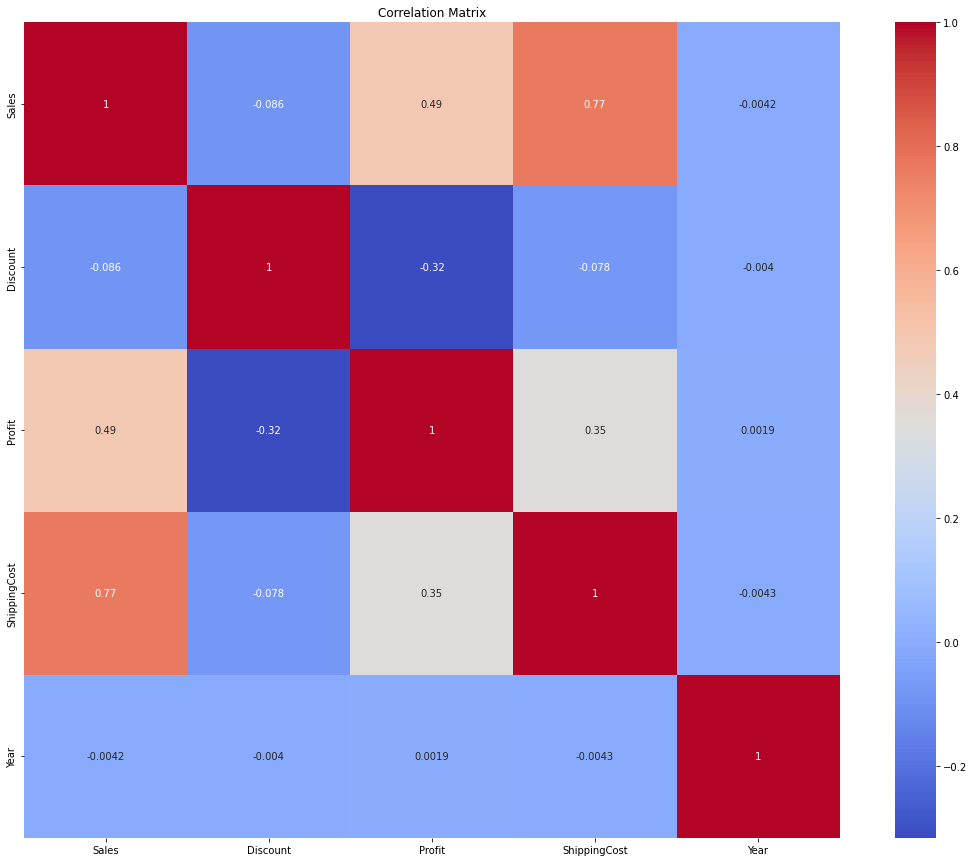

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Discount')

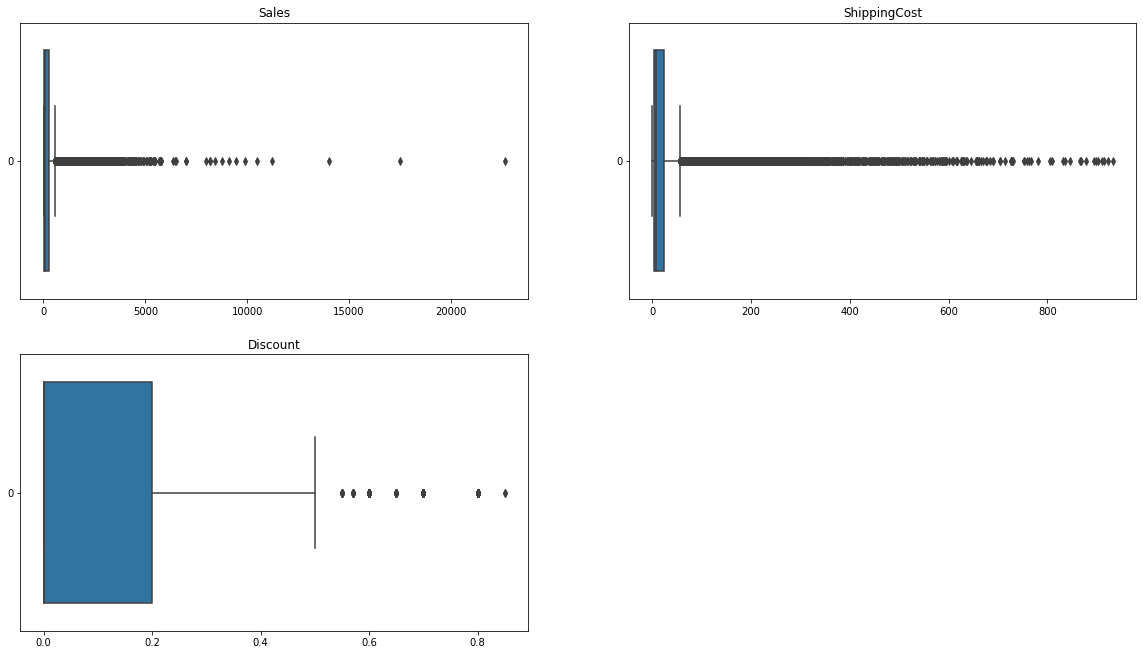

In [11]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(df['Sales'],orient="horizontal")
plt.title('Sales')
plt.subplot(10,2,2)
sns.boxplot(df['ShippingCost'],orient="horizontal")
plt.title('ShippingCost')
plt.subplot(10,2,3)
sns.boxplot(df['Discount'],orient="horizontal")
plt.title('Discount')

<AxesSubplot: xlabel='Discount', ylabel='Density'>

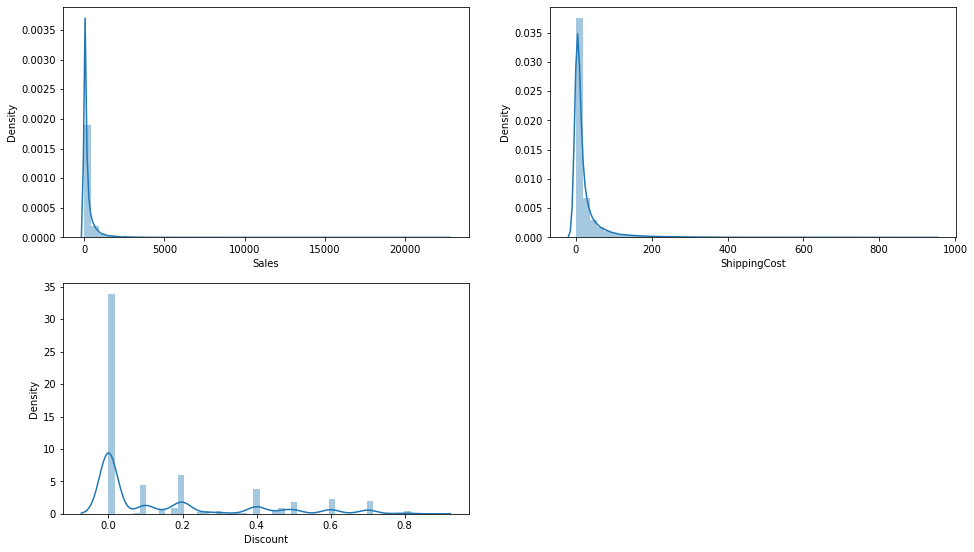

In [12]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(df['Sales'])
plt.subplot(10,2,2)
sns.distplot(df['ShippingCost'])
plt.subplot(10,2,3)
sns.distplot(df['Discount'])

In [13]:
# Removing outliers for 'total_sale'
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Sales'] >= Q1 - 1.5 * IQR) & (df['Sales'] <= Q3 + 1.5 * IQR)]
# Removing outliers for 'ShippingCost'
Q1 = df['ShippingCost'].quantile(0.25)
Q3 = df['ShippingCost'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['ShippingCost'] >= Q1 - 1.5 * IQR) & (df['ShippingCost'] <= Q3 + 1.5 * IQR)]
# Removing outliers for 'Discount'
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Discount'] >= Q1 - 1.5 * IQR) & (df['Discount'] <= Q3 + 1.5 * IQR)]

Text(0.5, 1.0, 'Discount')

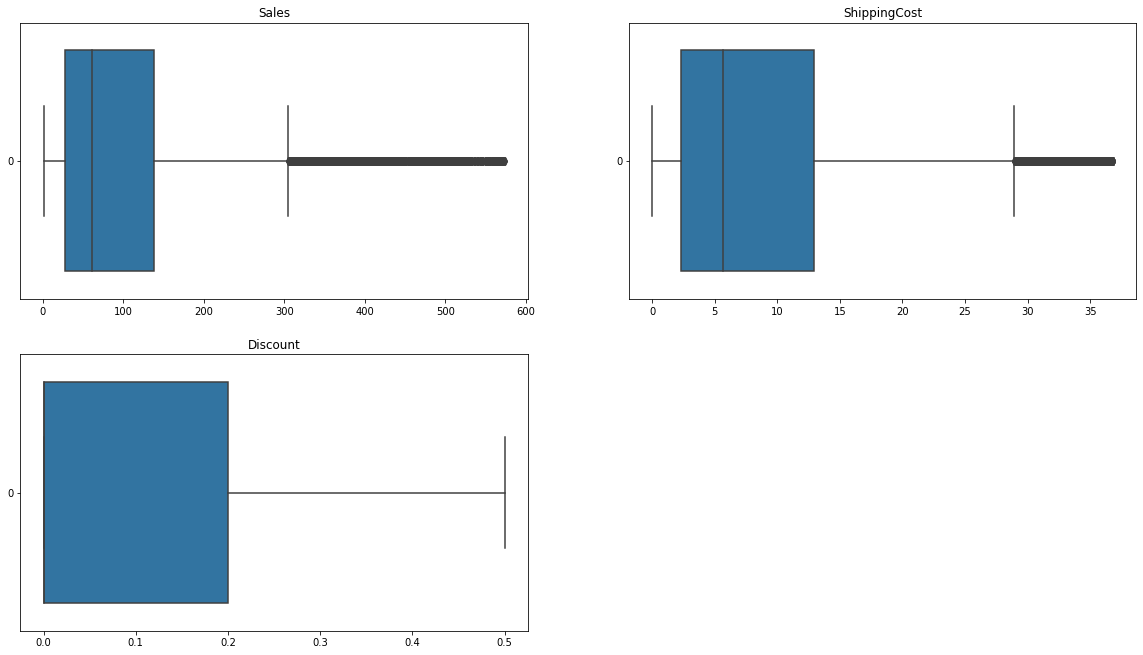

In [14]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(df['Sales'],orient="horizontal")
plt.title('Sales')
plt.subplot(10,2,2)
sns.boxplot(df['ShippingCost'],orient="horizontal")
plt.title('ShippingCost')
plt.subplot(10,2,3)
sns.boxplot(df['Discount'],orient="horizontal")
plt.title('Discount')

<AxesSubplot: xlabel='Discount', ylabel='Density'>

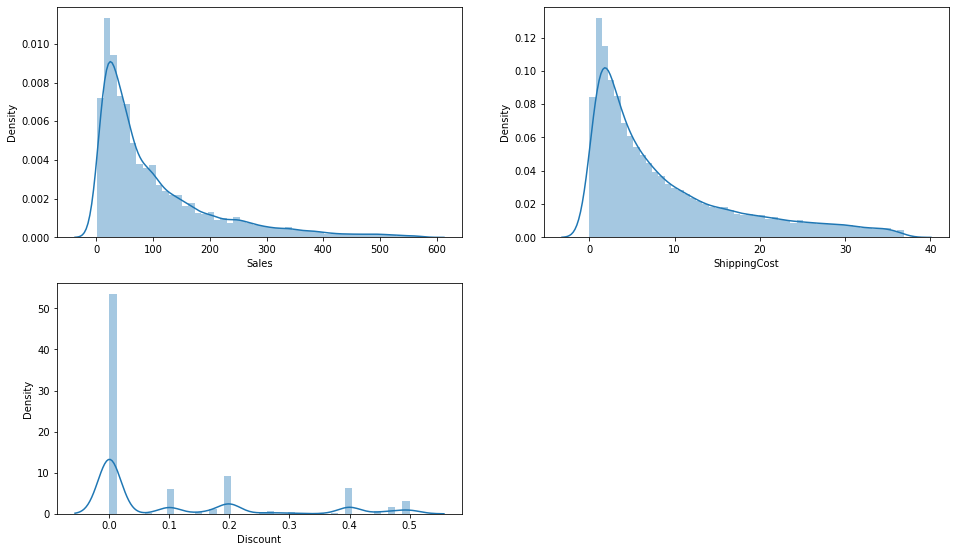

In [15]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(df['Sales'])
plt.subplot(10,2,2)
sns.distplot(df['ShippingCost'])
plt.subplot(10,2,3)
sns.distplot(df['Discount'])

In [16]:
order_priority_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Critical': 4}
df['OrderPriority'] = df['OrderPriority'].map(order_priority_mapping)
df

,Sales,Discount,Profit,ShippingCost,Region,ShipMode,OrderPriority,Category,Segment,Year
0,13.08,0.0,4.56,1.03,North,Standard Class,2,Office Supplies,Consumer,2014
1,252.16,0.0,90.72,13.45,South,Standard Class,2,Furniture,Consumer,2012
2,193.28,0.0,54.08,9.63,South,Standard Class,2,Furniture,Consumer,2012
3,35.44,0.0,4.96,1.37,South,Standard Class,2,Office Supplies,Consumer,2012
4,71.60,0.0,11.44,3.79,South,Standard Class,2,Office Supplies,Consumer,2012
...,...,...,...,...,...,...,...,...,...,...
49665,11.07,0.0,3.42,1.98,EMEA,First Class,3,Office Supplies,Consumer,2012
49666,61.44,0.0,18.42,13.02,EMEA,First Class,3,Technology,Consumer,2012
49667,80.52,0.0,20.88,8.78,EMEA,First Class,3,Office Supplies,Consumer,2012
49668,130.44,0.0,33.84,18.97,EMEA,First Class,3,Office Supplies,Consumer,2012


In [17]:
ship_mode_mapping = {'Same Day': 4, 'First Class': 3, 'Second Class': 2, 'Standard Class':1}
df['ShipMode'] = df['ShipMode'].map(ship_mode_mapping)
df

,Sales,Discount,Profit,ShippingCost,Region,ShipMode,OrderPriority,Category,Segment,Year
0,13.08,0.0,4.56,1.03,North,1,2,Office Supplies,Consumer,2014
1,252.16,0.0,90.72,13.45,South,1,2,Furniture,Consumer,2012
2,193.28,0.0,54.08,9.63,South,1,2,Furniture,Consumer,2012
3,35.44,0.0,4.96,1.37,South,1,2,Office Supplies,Consumer,2012
4,71.60,0.0,11.44,3.79,South,1,2,Office Supplies,Consumer,2012
...,...,...,...,...,...,...,...,...,...,...
49665,11.07,0.0,3.42,1.98,EMEA,3,3,Office Supplies,Consumer,2012
49666,61.44,0.0,18.42,13.02,EMEA,3,3,Technology,Consumer,2012
49667,80.52,0.0,20.88,8.78,EMEA,3,3,Office Supplies,Consumer,2012
49668,130.44,0.0,33.84,18.97,EMEA,3,3,Office Supplies,Consumer,2012


In [18]:
# One-hot encode nominal feature columns
for column in ['Segment', 'Region', 'Category']:
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

In [19]:
df

,Sales,Discount,Profit,ShippingCost,ShipMode,OrderPriority,Year,Segment_Consumer,Segment_Corporate,Segment_Home Office,...,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
0,13.08,0.0,4.56,1.03,1,2,2014,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,252.16,0.0,90.72,13.45,1,2,2012,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,193.28,0.0,54.08,9.63,1,2,2012,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,35.44,0.0,4.96,1.37,1,2,2012,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,71.60,0.0,11.44,3.79,1,2,2012,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,11.07,0.0,3.42,1.98,3,3,2012,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49666,61.44,0.0,18.42,13.02,3,3,2012,1,0,0,...,0,0,0,0,0,0,0,0,0,1
49667,80.52,0.0,20.88,8.78,3,3,2012,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49668,130.44,0.0,33.84,18.97,3,3,2012,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = df['Profit']
X = df.drop('Profit', axis=1)
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=4)  
    
# Scale X
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns) 

In [21]:
X_train

,Sales,Discount,ShippingCost,ShipMode,OrderPriority,Year,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Africa,...,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
13700,0.044774,0.00,0.046973,0.000000,0.666667,1.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26635,0.229787,0.14,0.285094,0.000000,0.333333,1.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
47565,0.189833,0.00,0.165354,0.000000,0.333333,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2436,0.190130,0.80,0.320119,0.666667,1.000000,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8773,0.418573,0.00,0.013304,0.666667,0.333333,0.333333,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30388,0.006129,0.40,0.024980,0.333333,1.000000,0.333333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15154,0.052178,0.60,0.097475,0.333333,0.666667,1.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35334,0.087923,0.80,0.108879,0.000000,0.333333,0.333333,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10640,0.148290,0.00,0.184089,0.000000,0.333333,0.666667,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
a = pd.DataFrame(columns = ['max_depth','R2_train','R2_test'])
lis = []
for i in range(20):
    rf_model = RandomForestRegressor(n_estimators=10, max_depth=i+1, min_samples_leaf=4, min_samples_split=2, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    y_train_pred = rf_model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
#     lis.append(i)
    a.loc[i] = [i+1,r2_train,r2]
    

In [46]:
a[['R2_train', 'R2_test']] = a[['R2_train', 'R2_test']].applymap(lambda x: '{:.2f}'.format(x*100) if isinstance(x, float) else x)
a

,max_depth,R2_train,R2_test
0,1.0,21.57,22.58
1,2.0,46.04,47.65
2,3.0,55.19,55.73
3,4.0,60.89,61.17
4,5.0,62.76,62.79
5,6.0,64.15,63.08
6,7.0,66.11,62.80
7,8.0,68.11,62.26
8,9.0,70.04,61.94
9,10.0,71.92,61.30


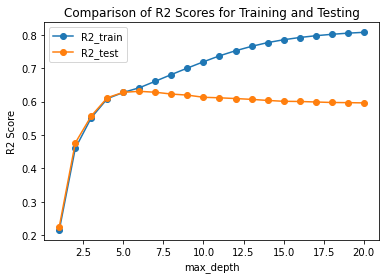

In [24]:

# Plotting
plt.plot(a['max_depth'], a['R2_train'], marker='o', label='R2_train')
plt.plot(a['max_depth'], a['R2_test'], marker='o', label='R2_test')

# Legend and labels
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('R2 Score')

# Title
plt.title('Comparison of R2 Scores for Training and Testing')

# Show the plot
plt.show()

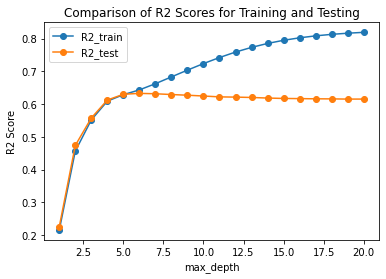

In [25]:
a2 = pd.DataFrame(columns = ['max_depth','R2_train','R2_test'])
lis = []
for i in range(20):
    rf_model = RandomForestRegressor(n_estimators=60, max_depth=i+1, min_samples_leaf=4, min_samples_split=3, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    y_train_pred = rf_model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
#     lis.append(i)
    a2.loc[i] = [i+1,r2_train,r2]
    
# Plotting
plt.plot(a2['max_depth'], a2['R2_train'], marker='o', label='R2_train')
plt.plot(a2['max_depth'], a2['R2_test'], marker='o', label='R2_test')

# Legend and labels
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('R2 Score')

# Title
plt.title('Comparison of R2 Scores for Training and Testing')

# Show the plot
plt.show()

R2 for diffrentes models 

In [27]:
evaluation_dic = {}

HistGradientBoostingRegressor is a regression machine learning model in Python's scikit-learn library. It is an implementation of the Gradient Boosting algorithm that uses histograms to speed up the computation of the gradient and obtain better performance on large datasets.

The HistGradientBoostingRegressor works by building an ensemble of decision trees, where each tree attempts to predict the target value based on a set of input features. The algorithm builds the trees in a sequential manner, where each new tree tries to correct the errors made by the previous trees.

The main difference between HistGradientBoostingRegressor and other implementations of Gradient Boosting is that it uses histograms to bin the features and group similar values together. This can reduce the computation time required to calculate the gradients at each iteration, especially for high-dimensional datasets with many features.

HistGradientBoostingRegressor provides several hyperparameters that can be tuned to improve its performance, such as the number of trees in the ensemble, the maximum depth of the trees, and the learning rate. It also supports early stopping to prevent overfitting and reduce training time.

Overall, HistGradientBoostingRegressor is a powerful regression model that can handle large datasets and achieve high accuracy with proper tuning of its hyperparameters.

In [28]:
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print("R2 score (Train): %.2f" % r2_train)
print("R2 score (Test): %.2f" % r2)
print("Mean squared error: %.2f" % mse)

y_hat = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
print(y_hat)
evaluation_dic['HistGradientBoostingRegressor'] = [r2_train,r2]

R2 score (Train): 0.67
R2 score (Test): 0.63
Mean squared error: 602.11
       actual  predicted
3095    -8.79 -11.257317
30193    3.46   3.866579
35293   53.04  44.029497
21507    6.16   5.849479
47054    7.41   5.192380
...       ...        ...
12685    7.92  28.272264
29411    4.44   3.958026
30330    4.08   3.641395
8405     4.34  -7.553081
46990    6.18   7.841536

[11017 rows x 2 columns]


In [29]:
rf_model = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=12)

# Train the model on the training set
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=10,
                      random_state=12)

In [30]:
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
y_train_pred = rf_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
evaluation_dic['RandomForestRegressor'] = [r2_train,r2]
y_hat = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

In [31]:
model = GradientBoostingRegressor(n_estimators=59, random_state=12)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
evaluation_dic['GradientBoostingRegressor'] = [r2_train,r2]

In [32]:
lin_reg = LinearRegression()
# Fit the model on the training data
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
evaluation_dic['LinearRegression'] = [r2_train,r2]

In [33]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Create a LinearRegression object and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred = lin_reg.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
evaluation_dic['PolynomialReg(2)'] = [r2_train,r2]

In [34]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

# Create a LinearRegression object and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred = lin_reg.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
evaluation_dic['PolynomialReg(3)'] = [r2_train,r2]

In [35]:
lasso_reg = Lasso(alpha=0.1)
# Fit the model on the training data
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
evaluation_dic['Lasso'] = [r2_train,r2]

In [36]:
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
# Fit the model on the training data
svr_reg.fit(X_train, y_train.ravel())
y_pred = svr_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
evaluation_dic['SVR'] = [r2_train,r2]

In [37]:
evaluation_dic

{'HistGradientBoostingRegressor': [0.6699978122642243, 0.6302806604377722],
 'RandomForestRegressor': [0.6283409624305047, 0.630400834091908],
 'GradientBoostingRegressor': [0.6362165957585224, 0.6269978551838989],
 'LinearRegression': [0.6362165957585224, 0.34008195936923935],
 'PolynomialReg(2)': [0.6362165957585224, 0.6234003520778758],
 'PolynomialReg(3)': [0.6362165957585224, -1.2534524359193224e+18],
 'Lasso': [0.6362165957585224, 0.33909378096542],
 'SVR': [0.6362165957585224, 0.5844106922439062]}

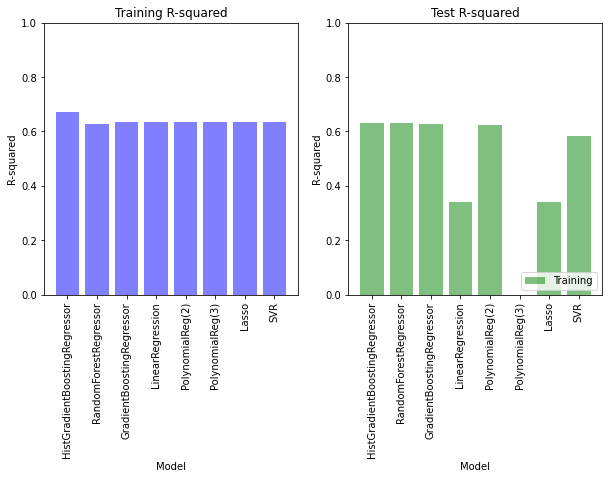

In [38]:
names = list(evaluation_dic.keys())
train_scores = [score[0] for score in evaluation_dic.values()]
test_scores = [score[1] for score in evaluation_dic.values()]

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the training R-squared values
axes[0].bar(names, train_scores, color='blue', alpha=0.5)
axes[0].set_ylim([0, 1])
axes[0].set_title('Training R-squared')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R-squared')
axes[0].tick_params(axis='x', labelrotation=90)

# Plot the test R-squared values
axes[1].bar(names, test_scores, color='green', alpha=0.5)
axes[1].set_ylim([0, 1])
axes[1].set_title('Test R-squared')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R-squared')
axes[1].tick_params(axis='x', labelrotation=90)

# Add a legend
plt.legend(['Training', 'Test'], loc='lower right')

# Show the plot
plt.show()

In [39]:
all_models = pd.DataFrame.from_dict(evaluation_dic, orient='index', columns=['Train R-squared', 'Test R-squared'])

# Select the second column and rename it
# all_models = all_models.iloc[:, 1].rename('Test R-squared')
# all_models['Test R-squared'] = all_models['Test R-squared']*100
# Show the table
all_models['Train R-squared']=all_models['Train R-squared']*100
all_models['Test R-squared']=all_models['Test R-squared']*100
all_models = all_models.applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, float) else x)
# Reset the index and rename the index column
all_models = all_models.reset_index().rename(columns={'index': 'Model'})
all_models

,Model,Train R-squared,Test R-squared
0,HistGradientBoostingRegressor,67.00,63.03
1,RandomForestRegressor,62.83,63.04
2,GradientBoostingRegressor,63.62,62.70
3,LinearRegression,63.62,34.01
4,PolynomialReg(2),63.62,62.34
5,PolynomialReg(3),63.62,-125345243591932231680.00
6,Lasso,63.62,33.91
7,SVR,63.62,58.44


In [ ]:
all_models.to_csv('models_comparison.csv', index=False)
y_hat.to_csv('comparison_output_RFR.csv', index=False)
a.to_csv('under_over.csv', index=False)